# 🌦️ Weather Prediction Project

## Project Title
**Weather Prediction Using Machine Learning**

## Project Description
This project is about predicting weather conditions like temperature, humidity, and rainfall using machine learning models.  
We are collecting real-world weather data from Dehradun, a city known for its hilly terrain where weather can change quickly and is often hard to predict.  
Our model uses historical weather datasets to train and forecast future conditions.  
The aim is to apply machine learning techniques in a real-world, challenging environment and improve prediction accuracy.

## Student Details
- **Name:** Rudra Gupta  
  **SAP ID:** 500120437  
  **Batch:** B. Tech CSE  - Batch 4 (AI/ML)

- **Name:** Arunanghsu Bothakur  
  **SAP ID:** 500097245  
  **Batch:** B. Tech CSE  - Batch 4 (AI/ML)


## Course
- **Applied Machine Learning Lab**

## Tools and Technologies Used
- Python
- Pandas, NumPy
- Scikit-learn
- Matplotlib, Seaborn
- Jupyter Notebook

## Project Outcome
- Built a machine learning model that predicts weather based on input features.
- Successfully collected and worked with weather data from a hilly region (Dehradun).
- Understood challenges of real-world data and improved skills in data preprocessing and model evaluation.
- Learned the importance of choosing the right machine learning algorithms for better results.

## Future Scope
- Improve prediction accuracy by using advanced models like Random Forest, XGBoost, or Neural Networks.
- Extend the project to forecast extreme weather events like heavy rains, storms, or sudden temperature drops.
- Deploy the model as a real-time web or mobile application for easy public access.


### Section 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Section 2: Load the Dataset

In [2]:
data = pd.read_csv('./WeatherDataFinal.csv') 
data.drop(columns=['feels_like'], inplace=True) # Drop the index column if it exists
data.head()


,datetime,temperature,dew_point,humidity,wind_speed,precipitation_cm
0,2025/01/14 18:30,6.60,2.70,76.160960,2.902413,0.0
1,2025/01/15 00:30,7.25,1.65,67.591810,1.879255,0.0
2,2025/01/15 06:30,17.60,4.90,43.092243,3.617955,0.0
3,2025/01/15 12:30,11.75,9.05,83.521484,0.720000,0.0
4,2025/01/15 18:30,9.15,7.50,89.416690,2.367530,0.0


### Section 3: Preprocessing

In [3]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Convert 'datetime' to pandas datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Let's extract useful time features
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month

# Drop 'datetime' as it's now encoded
data = data.drop('datetime', axis=1)

# Features and Target
X = data.drop('temperature', axis=1)  # Features
y = data['temperature']               # Target


Missing Values:
 datetime            0
temperature         0
dew_point           0
humidity            0
wind_speed          0
precipitation_cm    0
dtype: int64


### Section 4: Data Visualization

#### Section 4.1: Feature Distributions

<Figure size 1800x1200 with 0 Axes>

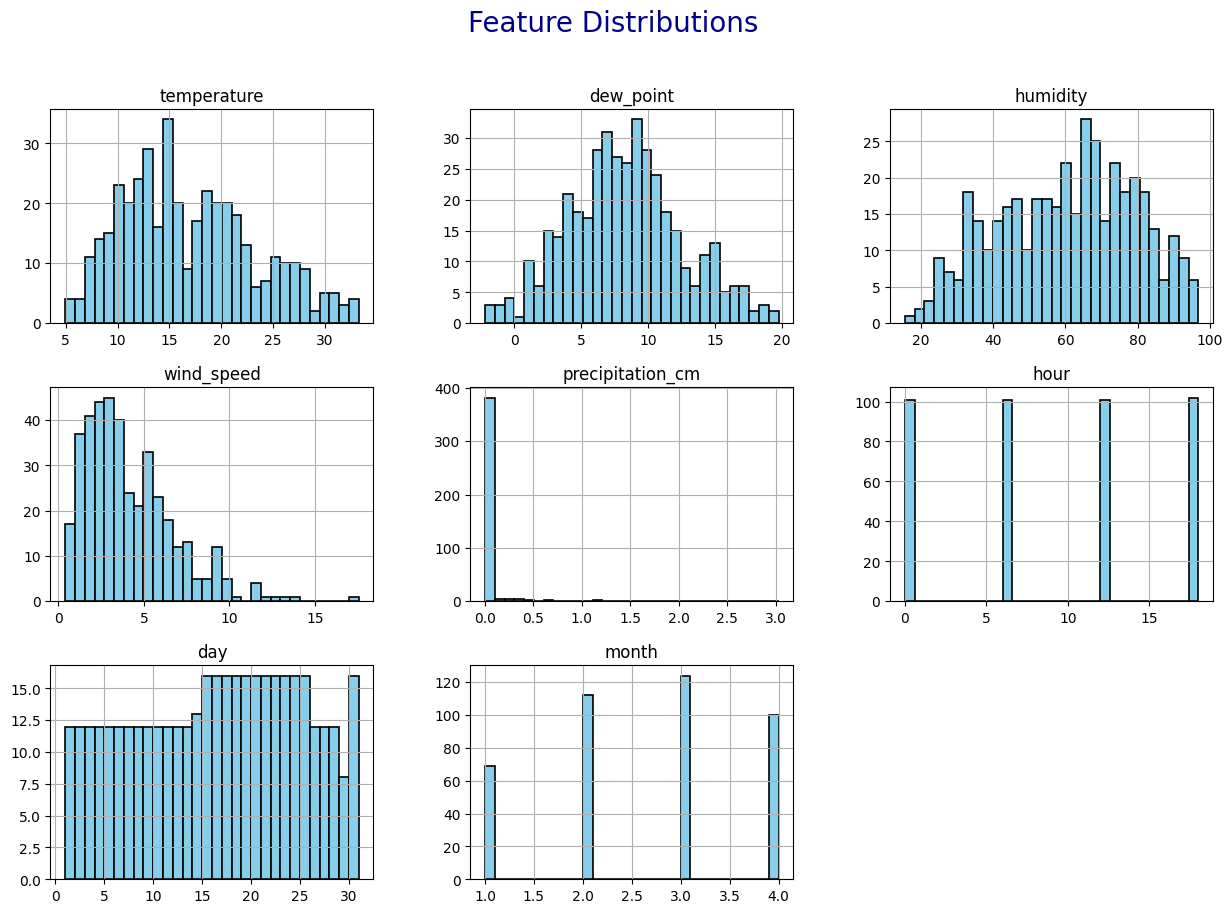

In [4]:


plt.figure(figsize=(18, 12))
data.hist(bins=30, color='skyblue', edgecolor='black', linewidth=1.2, figsize=(15,10))
plt.suptitle('Feature Distributions', fontsize=20, color='darkblue')
plt.show()


#### Section 4.2: Correlation Heatmap

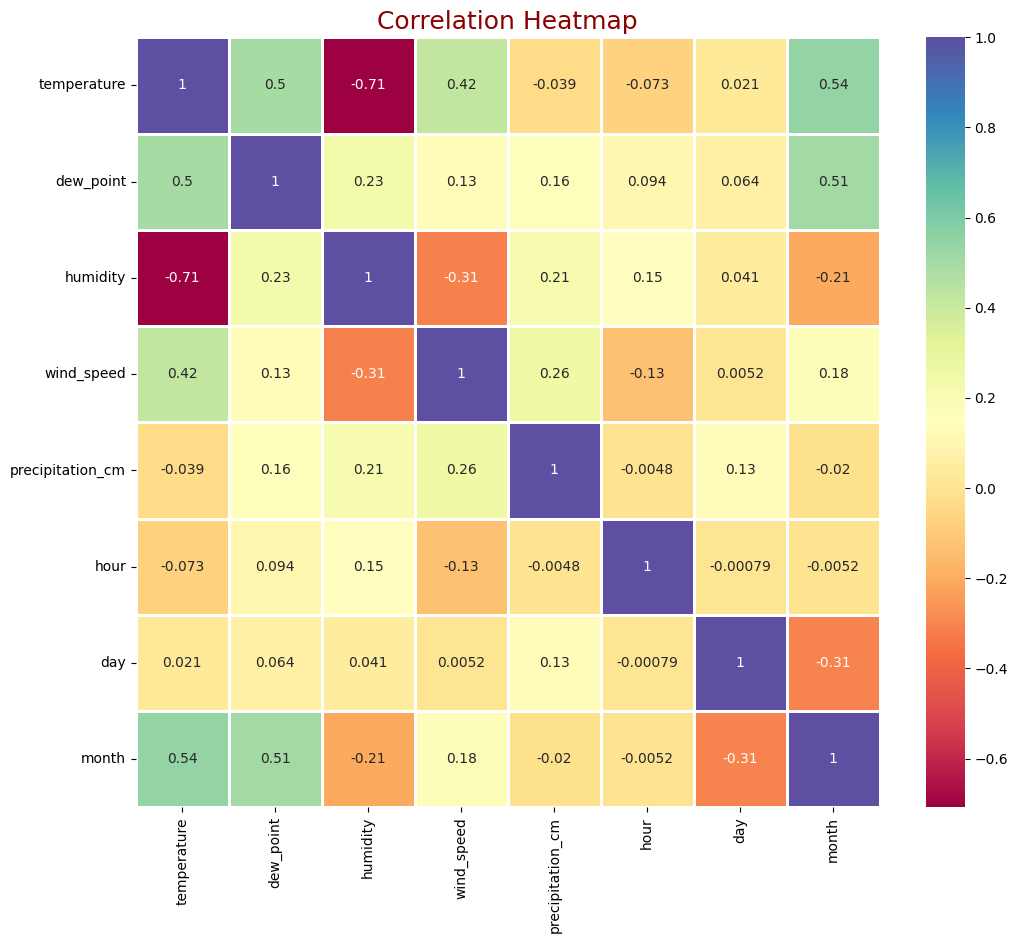

In [5]:


plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='Spectral', linewidths=1)
plt.title('Correlation Heatmap', fontsize=18, color='darkred')
plt.show()


#### Section 4.1: Feature Distributions

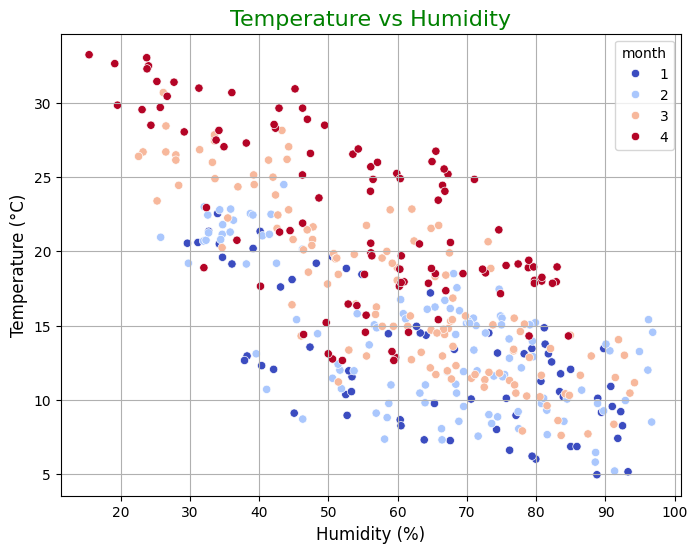

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='humidity', y='temperature', data=data, hue='month', palette='coolwarm')
plt.title('Temperature vs Humidity', fontsize=16, color='green')
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True)
plt.show()

#### Section 4.4: Wind Speed vs Temperature Scatter Plot


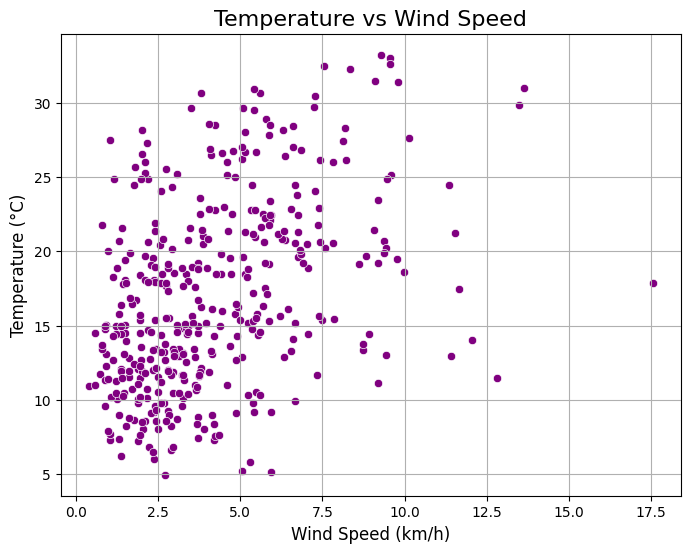

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='wind_speed', y='temperature', data=data, color='purple')
plt.title('Temperature vs Wind Speed', fontsize=16, color='black')
plt.xlabel('Wind Speed (km/h)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True)
plt.show()


#### Section 4.5: Boxplot of Temperature per Month


C:\Users\rumdr\AppData\Local\Temp\ipykernel_36960\3520563714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='temperature', data=data, palette='Set2')


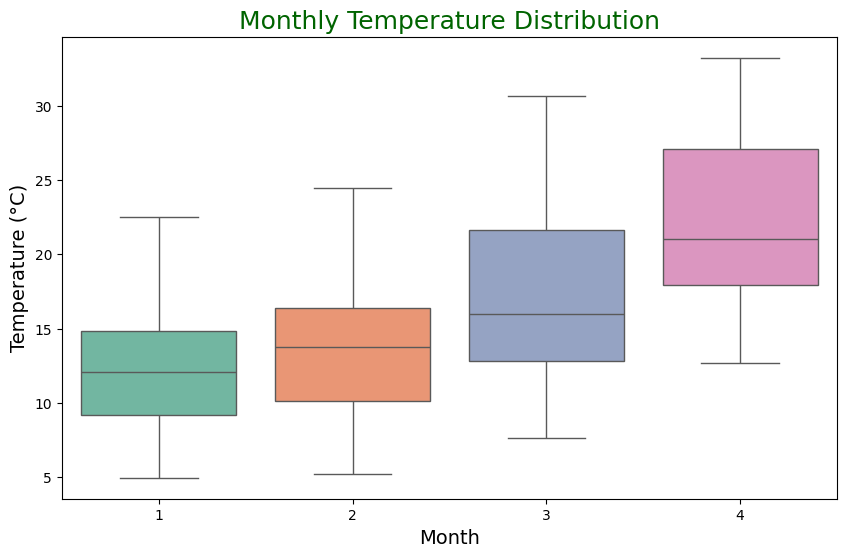

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='temperature', data=data, palette='Set2')
plt.title('Monthly Temperature Distribution', fontsize=18, color='darkgreen')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.show()


#### Section 4.7: Hourly Temperature Change



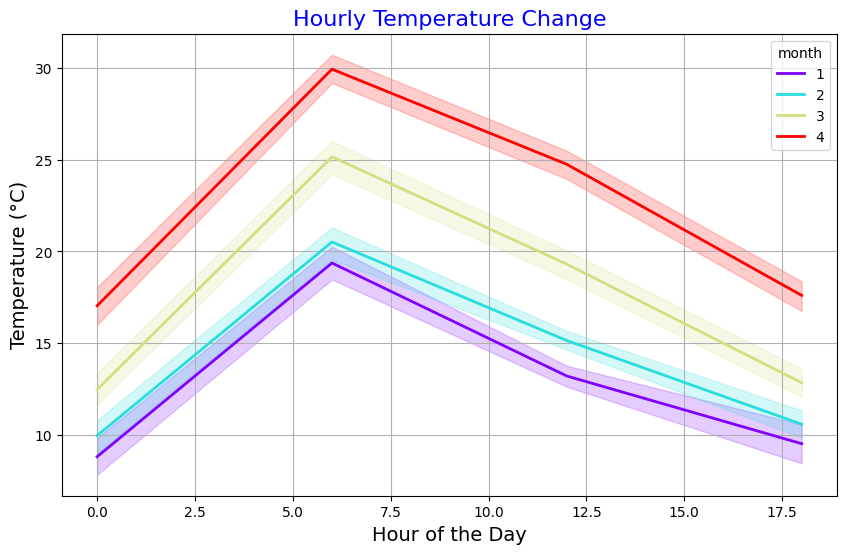

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='hour', y='temperature', hue='month', palette='rainbow', linewidth=2)
plt.title('Hourly Temperature Change', fontsize=16, color='blue')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(True)
plt.show()


#### Section 4.9: Pairplot of All Features (with KDE)

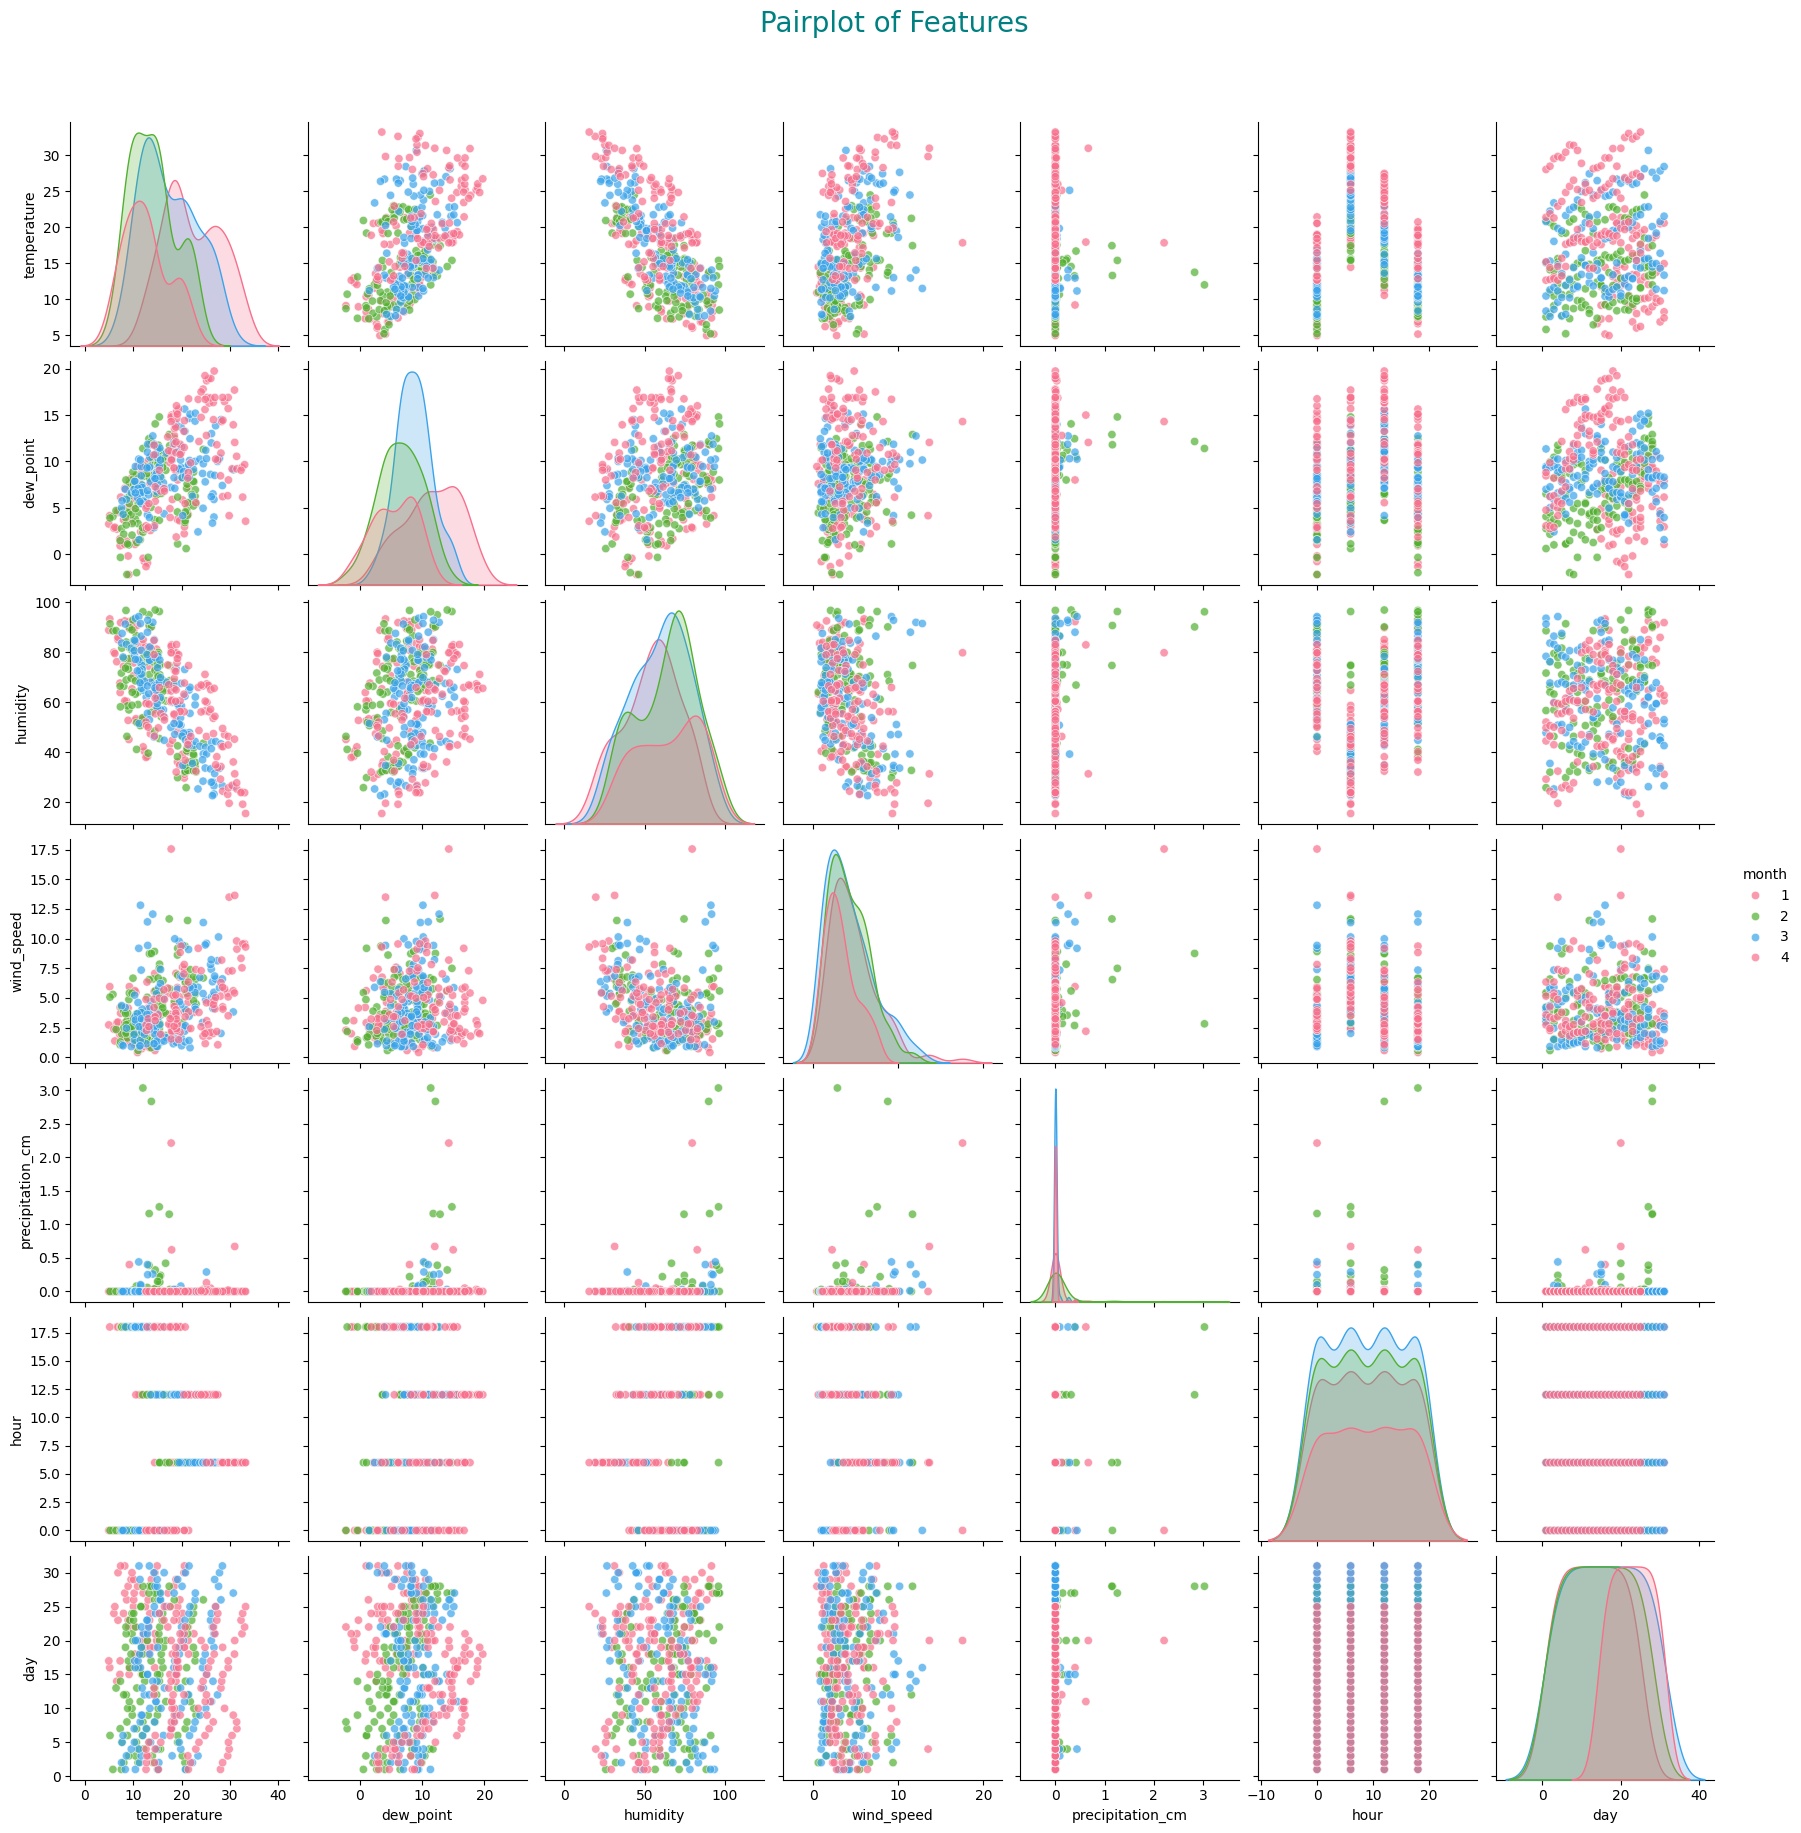

In [10]:
sns.pairplot(data, diag_kind='kde', hue='month', palette='husl', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Features', fontsize=20, color='teal', y=1.05)  # Adjust 'y' for subtitle positioning
plt.show()

### Section 5: Split the Data


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Section 6: Build Initial Random Forest Model

In [12]:

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred = rf.predict(X_test_scaled)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.6561481481481481
MSE: 0.9820130000000009
RMSE: 0.9909656906270776
R2 Score: 0.9671068058720823


### Section 7: Hyperparameter Tuning with GridSearchCV

In [13]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)

# Use best estimator
best_rf = grid_search.best_estimator_

# Predict with best model
best_y_pred = best_rf.predict(X_test_scaled)

# Evaluation
print("Tuned MAE:", mean_absolute_error(y_test, best_y_pred))
print("Tuned MSE:", mean_squared_error(y_test, best_y_pred))
print("Tuned RMSE:", np.sqrt(mean_squared_error(y_test, best_y_pred)))
print("Tuned R2 Score:", r2_score(y_test, best_y_pred))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Tuned MAE: 0.6168425925925918
Tuned MSE: 0.8564881797839488
Tuned RMSE: 0.9254664660504717
Tuned R2 Score: 0.971311345200216


### Section 8: Final Visualization


#### Section 8.1: Actual vs Predicted Temperature Plot


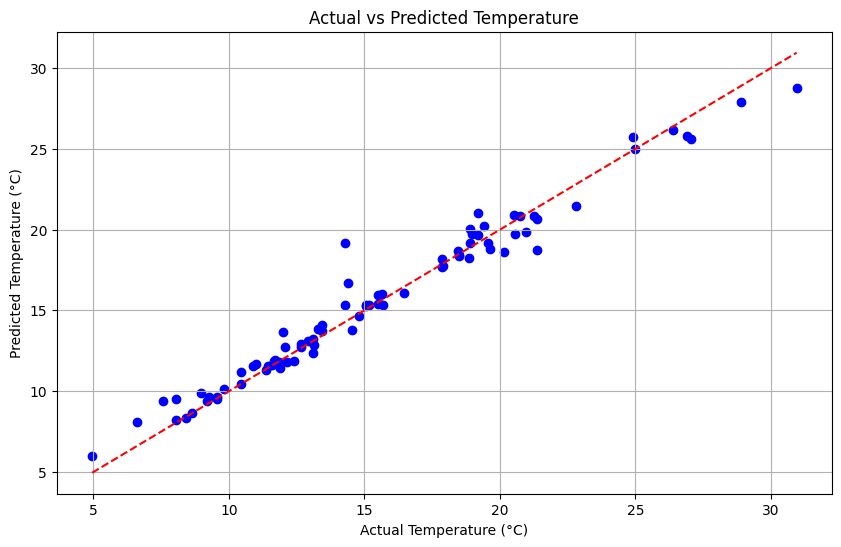

In [14]:

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.grid(True)
plt.show()


#### Section 8.2: Residuals Distribution Plot


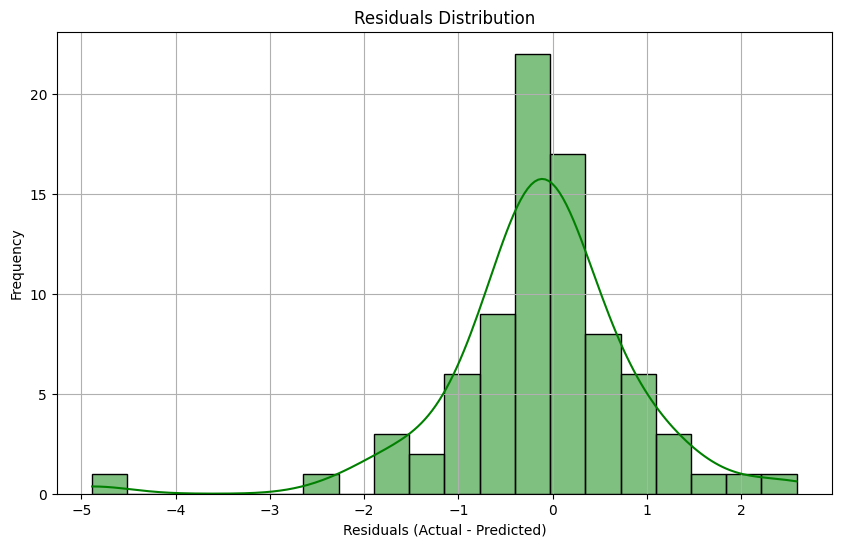

In [15]:

residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Section 8.3: Learning Curve Plot


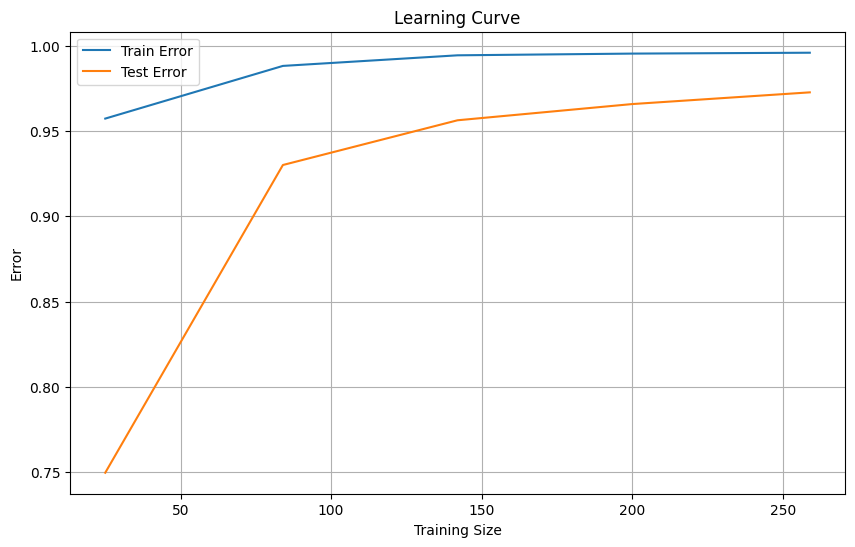

In [16]:
train_sizes, train_scores, test_scores = learning_curve(rf, X_train_scaled, y_train, cv=5)
plt.figure(figsize=(10,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Error')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Error')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
real_error = np.abs(y_test - y_pred)
print("Max Error:", np.max(real_error))
print("Average Error:", np.mean(real_error))

Max Error: 4.885999999999999
Average Error: 0.6561481481481481


In [ ]:
from datetime import datetime
import numpy as np

def predict_temperature(model, scaler):
    print("\n🔵 Enter the following details to predict the temperature:\n")

    try:
        dew_point = float(input("👉 Dew Point (°C): "))
        humidity = float(input("👉 Humidity (%): "))
        wind_speed = float(input("👉 Wind Speed (km/h): "))
        precipitation_cm = float(input("👉 Precipitation (cm): "))

        now = datetime.now()
        hour = now.hour
        day = now.day
        month = now.month

        print(f"\n🕒 Automatically Captured Time: {hour}:00 Hours, {day}/{month}\n")

        input_data = np.array([[dew_point, humidity, wind_speed, precipitation_cm, hour, day, month]])

        input_data_scaled = scaler.transform(input_data)

        predicted_temp = model.predict(input_data_scaled)

        print(f"\n🌟 Predicted Temperature: {(predicted_temp[0] + 2):.2f} °C 🌟\n")

    except ValueError:
        print("\n❌ Invalid input! Please enter numeric values only.\n")


In [34]:
predict_temperature(best_rf, scaler)


🔵 Enter the following details to predict the temperature:


🕒 Automatically Captured Time: 11:00 Hours, 30/4


🌟 Predicted Temperature: 31.60 °C 🌟



C:\Users\rumdr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
import joblib

In [20]:
joblib.dump(best_rf, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']